In [5]:
using Random
Random.seed!(13)

using CSV, Plots,DataFrames,LinearAlgebra, LowRankModels, Statistics, SparseArrays
pyplot()
include("proxgrad.jl")

proxgrad_const

In [6]:
train = CSV.read("train_data.csv")
test = CSV.read("test_data.csv")

# let's list all available categories, as well as their datatype using the "eltype" function.
feature_names = names(train)
for i in 1:19
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(train[!, i])))
end

1	Column1			Int64
2	CSI300			Float64
3	cproducts_ch			Float64
4	healthcare_ch			Float64
5	SP500			Float64
6	DJI_Retail			Float64
7	DJI_Pharma			Float64
8	lNew_cases_CH			Float64
9	lNew_deaths_CH			Float64
10	lNew_cases_US			Float64
11	lNew_deaths_US			Float64
12	lCOMEX_Gold			Float64
13	lUS_Tbill_10yr			Float64
14	lCSI300			Float64
15	lcproducts_ch			Float64
16	lhealthcare_ch			Float64
17	lSP500			Float64
18	lDJI_Retail			Float64
19	lDJI_Pharma			Float64


In [7]:
function MSE(y, pred)
    error=y-pred
    mse=0
    for i=1:length(error)
        mse=mse+error[i]^2
    end    
    println("MSE: ",mse/length(error))
end

MSE (generic function with 1 method)

In [8]:
function MAE(y, pred)
    error=y-pred
    mae=0
    for i=1:length(error)
        mae=mae+abs(error[i])
    end    
    println("MAE: ",mae/length(error)) 
end

MAE (generic function with 1 method)

In [9]:
function R2(y, pred)
    numerator=0
    denominator=0
    for i=1:length(y)
        numerator = numerator + (y[i] - pred[i])^2
        denominator = denominator + (y[i] - mean(y))^2
    end
    r2_score = 1 - (numerator / denominator)
    println("R^2: ",r2_score)
end

R2 (generic function with 1 method)

# Naive Linear Regression

In [10]:
y = convert(Matrix,train[:,2:7])
x = convert(Matrix,train[:, 8:19]) 
Xoffset = [x ones(length(y[:,1]))];
n=length(y[:,1])

184

In [11]:
for i in 1:6
    d = zip(push!(names(train)[8:19], "intercept"), Xoffset \ y[:,i])
    println(feature_names[i+1])
    for (n,v) in d
        println("$n: $v")
    end
end

CSI300
lNew_cases_CH: 0.00493633184282528
lNew_deaths_CH: -0.00045845746340704554
lNew_cases_US: 0.001975292035001388
lNew_deaths_US: -0.001624295536875379
lCOMEX_Gold: 0.006366723053999121
lUS_Tbill_10yr: -0.02555230818437543
lCSI300: 0.9605182695349588
lcproducts_ch: -0.060922386658931175
lhealthcare_ch: -0.10033943112446732
lSP500: -0.0184601301881535
lDJI_Retail: 0.19957578054827285
lDJI_Pharma: -0.0630470773331369
intercept: 0.8988365456244732
cproducts_ch
lNew_cases_CH: 0.005091351775637317
lNew_deaths_CH: -0.0009268851463237767
lNew_cases_US: 0.0020075638935008614
lNew_deaths_US: -0.0008719712480633782
lCOMEX_Gold: 0.03914436404435177
lUS_Tbill_10yr: -0.030724094092620557
lCSI300: 0.14830237543576816
lcproducts_ch: 0.7341210908732063
lhealthcare_ch: -0.10560579865050679
lSP500: -0.13423878435370806
lDJI_Retail: 0.3677910473822696
lDJI_Pharma: -0.10370774989844173
intercept: 1.117783673604384
healthcare_ch
lNew_cases_CH: 0.005960820170450361
lNew_deaths_CH: -0.004974048963389459


# Linear Regression

### Quadratic loss + Regularization l1

In [12]:
for i=1:6
    w = proxgrad(1/n*QuadLoss(), OneReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=Xoffset*w
    MSE(y[:,i], pred)
    MAE(y[:,i], pred)
    R2(y[:,i], pred)
end

CSI300
MSE: 0.005667526243034605
MAE: 0.06542354217946376
R^2: 0.3919798068403286
cproducts_ch
MSE: 0.004179232541542969
MAE: 0.058982864818302935
R^2: 0.8575080059112373
healthcare_ch
MSE: 0.004631914883201847
MAE: 0.060482665804487905
R^2: 0.7870074545848057
SP500
MSE: 0.008344851467279452
MAE: 0.06547733314954242
R^2: 0.14823019443573393
DJI_Retail
MSE: 0.00620750251877586
MAE: 0.07015449880685415
R^2: 0.7097543521209764
DJI_Pharma
MSE: 0.007650068886608143
MAE: 0.06992341555107107
R^2: -1.0670355949223436


### Quadratic Loss + Regularization l2

In [13]:
for i=1:6
    w = proxgrad(1/n*QuadLoss(), QuadReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=Xoffset*w
    MSE(y[:,i], pred)
    MAE(y[:,i], pred)
    R2(y[:,i], pred)
end

CSI300
MSE: 0.0068421488960382975
MAE: 0.053204358545851045
R^2: 0.2659646351864212
cproducts_ch
MSE: 0.00935891366638902
MAE: 0.06554823286690946
R^2: 0.6809054634858889
healthcare_ch
MSE: 0.007562720506639701
MAE: 0.0567373750705872
R^2: 0.6522381927149323
SP500
MSE: 0.007197382397849989
MAE: 0.06253055870778575
R^2: 0.26535384966091
DJI_Retail
MSE: 0.006361825095284962
MAE: 0.061600857475284564
R^2: 0.702538655298339
DJI_Pharma
MSE: 0.006310153344743638
MAE: 0.06473200953953587
R^2: -0.7049926956653159


# Quantile Regression

### CSI300

In [48]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,1],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,1], pred)
    MAE(y[:,1], pred)
    R2(y[:,1], pred)
end

quantile=0.05
MSE: 0.2705463147242684
MAE: 0.33726269183110813
R^2: -28.024589474015162
quantile=0.1
MSE: 0.004543265141010645
MAE: 0.04657354357904378
R^2: 0.5125921204144608
quantile=0.15
MSE: 0.00480036514946673
MAE: 0.04692442910343132
R^2: 0.4850100696043844
quantile=0.2
MSE: 0.01759545261374147
MAE: 0.08690684818953041
R^2: -0.8876649243728274
quantile=0.25
MSE: 0.007089793014357634
MAE: 0.05473799874823503
R^2: 0.2393970255806548
quantile=0.3
MSE: 0.0070740127089910084
MAE: 0.05376555322200422
R^2: 0.24108995895329266
quantile=0.35000000000000003
MSE: 0.006987452388439269
MAE: 0.05271940880307165
R^2: 0.250376271987399
quantile=0.4
MSE: 0.004143173055544084
MAE: 0.03932528860678518
R^2: 0.5555145625268385
quantile=0.45
MSE: 0.005091423786096511
MAE: 0.046228498244719377
R^2: 0.4537848893624886
quantile=0.5
MSE: 0.007200110954256641
MAE: 0.0567059144438153
R^2: 0.2275619617009229
quantile=0.55
MSE: 0.005605488018636522
MAE: 0.05012761965659259
R^2: 0.39863535488091584
quantile=0.

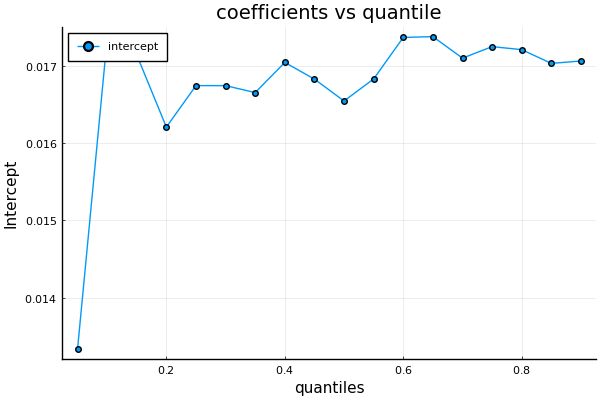

In [49]:
plot(a,w_quantile[:,13],markershape=:circle,legend=:topleft,label="intercept")
xlabel!("quantiles")
ylabel!("Intercept")
title!("coefficients vs quantile")

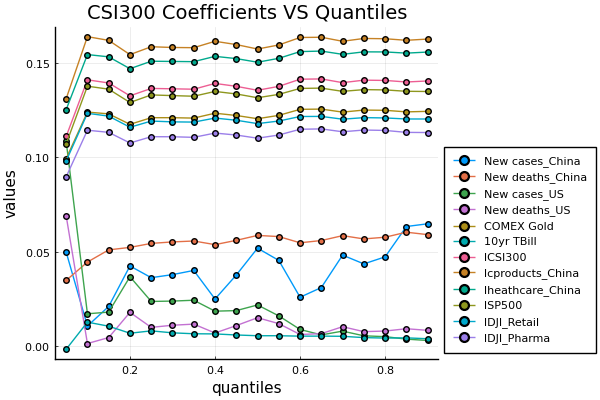

In [50]:
plot(a,w_quantile[:,1],markershape=:circle,label="New cases_China")
plot!(a,w_quantile[:,2],markershape=:circle,label="New deaths_China")
plot!(a,w_quantile[:,3],markershape=:circle,label="New cases_US")
plot!(a,w_quantile[:,4],markershape=:circle,label="New deaths_US")
plot!(a,w_quantile[:,5],markershape=:circle,label="COMEX Gold")
plot!(a,w_quantile[:,6],markershape=:circle,label="10yr TBill")
plot!(a,w_quantile[:,7],markershape=:circle,label="lCSI300")
plot!(a,w_quantile[:,8],markershape=:circle,label="lcproducts_China")
plot!(a,w_quantile[:,9],markershape=:circle,label="lheathcare_China")
plot!(a,w_quantile[:,10],markershape=:circle,label="lSP500")
plot!(a,w_quantile[:,11],markershape=:circle,label="lDJI_Retail")
plot!(a,w_quantile[:,12],markershape=:circle,label="lDJI_Pharma")
plot!(legend= :outerbottomright)

xlabel!("quantiles")
ylabel!("values")
title!("CSI300 Coefficients VS Quantiles")

### cproducts_ch

In [192]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,2],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,2], pred)
    MAE(y[:,2], pred)
    R2(y[:,2], pred)
end

quantile=0.05
MSE: 0.17393242190545796
MAE: 0.28109828852379704
R^2: -4.9302700645718245
quantile=0.1
MSE: 0.020126372724195686
MAE: 0.10293353713386243
R^2: 0.3137862143977469
quantile=0.15
MSE: 0.012818085991450599
MAE: 0.08076073771537712
R^2: 0.5629641052113608
quantile=0.2
MSE: 0.009176560168951327
MAE: 0.06656579216429029
R^2: 0.6871228522577908
quantile=0.25
MSE: 0.008735886591523984
MAE: 0.06354510555948666
R^2: 0.7021477297121256
quantile=0.3
MSE: 0.007250316860915827
MAE: 0.055762396047035506
R^2: 0.7527986066777106
quantile=0.35000000000000003
MSE: 0.00889622040706276
MAE: 0.06146062548240527
R^2: 0.6966811075826125
quantile=0.4
MSE: 0.005612888278851527
MAE: 0.04874352381336797
R^2: 0.8086271497216772
quantile=0.45
MSE: 0.005439179690742714
MAE: 0.049272781154660404
R^2: 0.814549788116149
quantile=0.5
MSE: 0.005475630675073004
MAE: 0.05079310866960278
R^2: 0.8133069825550582
quantile=0.55
MSE: 0.006603462112724349
MAE: 0.05622036095889197
R^2: 0.774853283472881
quantile=0.6

### healthcare_ch

In [193]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,3],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,3], pred)
    MAE(y[:,3], pred)
    R2(y[:,3], pred)
end

quantile=0.05
MSE: 0.24183246177052223
MAE: 0.30835391134046486
R^2: -10.120349336151993
quantile=0.1
MSE: 0.07210511879677428
MAE: 0.171791079386396
R^2: -2.3156595441092587
quantile=0.15
MSE: 0.019987899069817638
MAE: 0.09361721414449534
R^2: 0.08088261383603412
quantile=0.2
MSE: 0.013951642078664462
MAE: 0.07836001303875872
R^2: 0.358451993616442
quantile=0.25
MSE: 0.007061701608330805
MAE: 0.05358697173200373
R^2: 0.6752768912106528
quantile=0.3
MSE: 0.006793207343643585
MAE: 0.0520178804421359
R^2: 0.6876232486691001
quantile=0.35000000000000003
MSE: 0.006257348785291843
MAE: 0.05000997914988956
R^2: 0.7122640033469922
quantile=0.4
MSE: 0.004432336000331692
MAE: 0.04183844121917166
R^2: 0.7961848283806408
quantile=0.45
MSE: 0.0031795467741758243
MAE: 0.035907821573917455
R^2: 0.8537927017712714
quantile=0.5
MSE: 0.003925071949176145
MAE: 0.040473573755221814
R^2: 0.8195107020587333
quantile=0.55
MSE: 0.0032155883451673874
MAE: 0.03681788076922771
R^2: 0.8521353772867272
quantile=0

### SP500

In [51]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,4],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,4], pred)
    MAE(y[:,4], pred)
    R2(y[:,4], pred)
end

quantile=0.05
MSE: 0.18782441882046766
MAE: 0.2830131452392073
R^2: -18.171481880322546
quantile=0.1
MSE: 0.10941722844146223
MAE: 0.21492987470217081
R^2: -10.16835832973181
quantile=0.15
MSE: 0.0059843848127638264
MAE: 0.061188274849909616
R^2: 0.3891660854148917
quantile=0.2
MSE: 0.006625212743827444
MAE: 0.06348362355519227
R^2: 0.32375594787290385
quantile=0.25
MSE: 0.004860412552246749
MAE: 0.053832094079403134
R^2: 0.5038913908986544
quantile=0.3
MSE: 0.003526997127070299
MAE: 0.04437420726662621
R^2: 0.6399948316719644
quantile=0.35000000000000003
MSE: 0.00365497709588252
MAE: 0.04433190709658866
R^2: 0.6269317503722267
quantile=0.4
MSE: 0.004263995721733353
MAE: 0.047186182118922296
R^2: 0.5647684298433955
quantile=0.45
MSE: 0.003274281842263299
MAE: 0.04027884036782277
R^2: 0.66578980835276
quantile=0.5
MSE: 0.0038809369794340783
MAE: 0.043623310852027516
R^2: 0.6038677321769716
quantile=0.55
MSE: 0.004878321287221656
MAE: 0.04914426705306125
R^2: 0.5020634231071017
quantile=

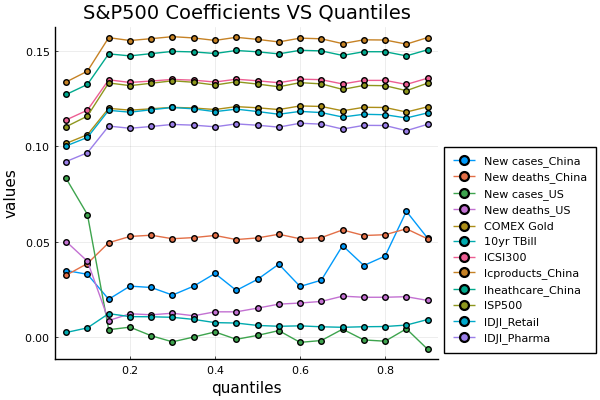

In [52]:
plot(a,w_quantile[:,1],markershape=:circle,label="New cases_China")
plot!(a,w_quantile[:,2],markershape=:circle,label="New deaths_China")
plot!(a,w_quantile[:,3],markershape=:circle,label="New cases_US")
plot!(a,w_quantile[:,4],markershape=:circle,label="New deaths_US")
plot!(a,w_quantile[:,5],markershape=:circle,label="COMEX Gold")
plot!(a,w_quantile[:,6],markershape=:circle,label="10yr TBill")
plot!(a,w_quantile[:,7],markershape=:circle,label="lCSI300")
plot!(a,w_quantile[:,8],markershape=:circle,label="lcproducts_China")
plot!(a,w_quantile[:,9],markershape=:circle,label="lheathcare_China")
plot!(a,w_quantile[:,10],markershape=:circle,label="lSP500")
plot!(a,w_quantile[:,11],markershape=:circle,label="lDJI_Retail")
plot!(a,w_quantile[:,12],markershape=:circle,label="lDJI_Pharma")
plot!(legend= :outerbottomright)

xlabel!("quantiles")
ylabel!("values")
title!("S&P500 Coefficients VS Quantiles")

### DJI_Retail

In [195]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,5],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,5], pred)
    MAE(y[:,5], pred)
    R2(y[:,5], pred)
end

quantile=0.05
MSE: 0.16773569466163016
MAE: 0.2870614108702433
R^2: -6.842857126879373
quantile=0.1
MSE: 0.023124431336565904
MAE: 0.11511753357126744
R^2: -0.08123444731829887
quantile=0.15
MSE: 0.005545332672238887
MAE: 0.0639652868280975
R^2: 0.7407155825889068
quantile=0.2
MSE: 0.005643657383898004
MAE: 0.0627775751697679
R^2: 0.7361181910370389
quantile=0.25
MSE: 0.004337730445447275
MAE: 0.053896791597405
R^2: 0.7971797224962399
quantile=0.3
MSE: 0.0036955267739279653
MAE: 0.047329509984340296
R^2: 0.8272073898466138
quantile=0.35000000000000003
MSE: 0.00381329897409547
MAE: 0.04671589848449955
R^2: 0.8217006875236808
quantile=0.4
MSE: 0.0037165074505852314
MAE: 0.04480668850901637
R^2: 0.8262263914384924
quantile=0.45
MSE: 0.004671186240781595
MAE: 0.04893668220253715
R^2: 0.7815882518422883
quantile=0.5
MSE: 0.006546270748292325
MAE: 0.05676161902763603
R^2: 0.6939144867388154
quantile=0.55
MSE: 0.004112856352570258
MAE: 0.044002684791339654
R^2: 0.8076942130793494
quantile=0.6

### DJI_Pharma

In [196]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,6],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    println("quantile=", i)
    MSE(y[:,6], pred)
    MAE(y[:,6], pred)
    R2(y[:,6], pred)
end

quantile=0.05
MSE: 0.1582210808167769
MAE: 0.273409960452861
R^2: -41.75106678946105
quantile=0.1
MSE: 0.10194139547011287
MAE: 0.21971142608645736
R^2: -26.54439158079337
quantile=0.15
MSE: 0.01697039146833544
MAE: 0.10330915123076606
R^2: -3.5853708959696347
quantile=0.2
MSE: 0.008224620670115406
MAE: 0.06949777140769633
R^2: -1.222278509102452
quantile=0.25
MSE: 0.006990221713865843
MAE: 0.06378024752249148
R^2: -0.8887460117193953
quantile=0.3
MSE: 0.007538975369107322
MAE: 0.06603469394723961
R^2: -1.0370183155431585
quantile=0.35000000000000003
MSE: 0.006196497245203917
MAE: 0.06016127713534241
R^2: -0.6742830109800053
quantile=0.4
MSE: 0.004980620725908893
MAE: 0.05473320129359946
R^2: -0.345755244542151
quantile=0.45
MSE: 0.004152921330062462
MAE: 0.051282005195211734
R^2: -0.12211227629316102
quantile=0.5
MSE: 0.00362058591851598
MAE: 0.04929478583445483
R^2: 0.021723846023390503
quantile=0.55
MSE: 0.003170384705789239
MAE: 0.04756034303514957
R^2: 0.14336744758786957
quantile